<a href="https://colab.research.google.com/github/shub0411/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

Data Description Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

##Importing necessary libraries


In [1]:
#importing required libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.impute import KNNImputer

%matplotlib inline
import seaborn as sns
from scipy import stats
from datetime import datetime
import datetime as dt

##Mount drive to colab notebook

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Loading data from csv file to dataframe

In [3]:
# CSV file loaction path
cardio_df=pd.read_csv('/content/drive/MyDrive/capstone project 3/data_cardiovascular_risk.csv', encoding ='latin')

# ***Data Exploration And Data Cleaning***

In [5]:
# Check 1st Five rows
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Check last 5 rows
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
# different columns name
cardio_df.columns


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
# Check the info of dataset to know the data types of columns or variable
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
## Check the Summary of Bike data to egt mean,max,25%,50%,75% etc
cardio_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
# Check Total rows and Columns in dataset.
# Rows= 3390
# Columns=17
print(f' The shape of dataset is {(cardio_df.shape)} \n Total Rows are : {(cardio_df.shape)[0]}\n Total Columns are : {(cardio_df.shape)[1]}')

 The shape of dataset is (3390, 17) 
 Total Rows are : 3390
 Total Columns are : 17


In [11]:
# check for Null values in our bike data
# as we can see we don't have any null values.
cardio_df.isna().sum()
cardio_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


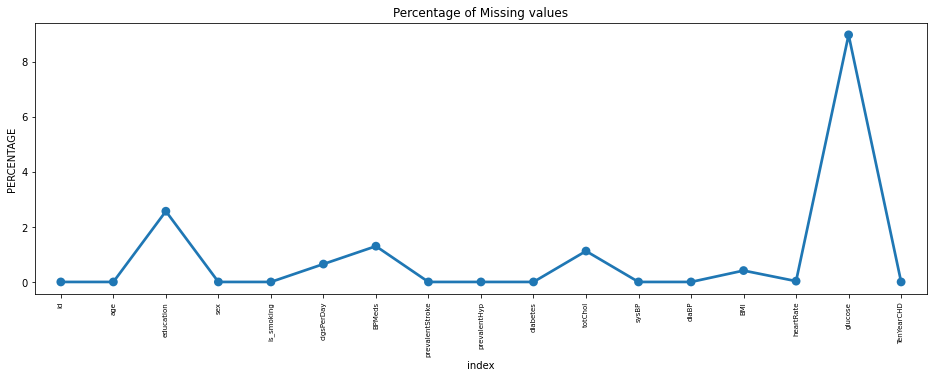

In [12]:
# Visulaizing null values
missing = pd.DataFrame((cardio_df.isnull().sum())*100/cardio_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [13]:
# duplicate values in data set
value=len(cardio_df[cardio_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [14]:
# Replacing string categorical value with numerical value 0 or 1

cardio_df['sex'] = cardio_df['sex'].replace({'F':1,'M':0})
cardio_df['is_smoking'] = cardio_df['is_smoking'].replace({'YES':1,'NO':0})

In [15]:
# checking if data contains null values
cardio_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**To prevent data leakage, splitting into train and test data set**

In [16]:
# drop the id column which is not releavent to dataset.
cardio_df.drop(['id'],axis=1,inplace=True)

In [17]:
# splitting dataset into training and test data
train,test=train_test_split(cardio_df,test_size=0.2,random_state=0, stratify=cardio_df['TenYearCHD'])

In [18]:
# Checking shape
print(train.shape)
print(test.shape)

(2712, 16)
(678, 16)


In [19]:
#check the train null values
train.isna().sum()

age                  0
education           68
sex                  0
is_smoking           0
cigsPerDay          19
BPMeds              36
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             30
sysBP                0
diaBP                0
BMI                 13
heartRate            1
glucose            255
TenYearCHD           0
dtype: int64

In [20]:
#check the test null values
test.isna().sum()

age                 0
education          19
sex                 0
is_smoking          0
cigsPerDay          3
BPMeds              8
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             8
sysBP               0
diaBP               0
BMI                 1
heartRate           0
glucose            49
TenYearCHD          0
dtype: int64

**Imputing null values using KNN imputer**

The idea in kNN methods is to identify 'k' samples in the dataset that are similar or close in the space. Then we use these 'k' samples to estimate the value of the missing data points. Each sample's missing values are imputed using the mean value of the 'k'-neighbors found in the dataset.

In [21]:
# imputing missing values using KNN imputer for continuous variables
cont = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
imputer = KNNImputer(n_neighbors=3)
train[cont] = imputer.fit_transform(train[cont])
test[cont] = imputer.fit_transform(test[cont])

In [22]:
# imputing missing values using KNN imputer for categorical variables
from sklearn.impute import SimpleImputer
category = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
frequent= SimpleImputer(strategy="most_frequent")
train[category] = frequent.fit_transform(train[category])
test[category] = frequent.fit_transform(test[category])

In [23]:
train.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1609,48.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0,117.0,81.5,28.96,67.0,78.0,0
1789,48.0,1.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,268.0,116.5,82.0,21.34,60.0,82.0,0
2117,49.0,2.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,246.0,141.0,92.0,27.92,75.0,76.0,0
1126,37.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,275.0,127.0,80.0,27.22,85.0,93.0,0
1581,62.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,211.0,128.0,78.0,27.99,56.0,83.0,1


In [24]:
# checking if data contains null values in train set
train.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [25]:
# checking if data contains null values in test set
test.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# **Checking the various distribution**

In [26]:
train['TenYearCHD'].value_counts()

0    2303
1     409
Name: TenYearCHD, dtype: int64

In [27]:
train['prevalentStroke'].value_counts()

0.0    2693
1.0      19
Name: prevalentStroke, dtype: int64

In [28]:
train['prevalentHyp'].value_counts()

0.0    1846
1.0     866
Name: prevalentHyp, dtype: int64

In [29]:
train['diabetes'].value_counts()

0.0    2637
1.0      75
Name: diabetes, dtype: int64

In [30]:
train['BMI'].value_counts()

22.54    16
22.19    14
22.91    12
25.09    11
23.10    10
         ..
18.75     1
26.10     1
19.50     1
35.16     1
29.38     1
Name: BMI, Length: 1160, dtype: int64

In [31]:
train['diaBP'].value_counts()

80.0     174
82.0     100
70.0      86
85.0      84
90.0      82
        ... 
51.0       1
116.0      1
60.5       1
50.0       1
136.0      1
Name: diaBP, Length: 136, dtype: int64

In [32]:
train['sysBP'].value_counts()

110.0    68
120.0    67
130.0    66
125.0    56
124.0    53
         ..
148.5     1
185.5     1
99.5      1
188.5     1
208.0     1
Name: sysBP, Length: 220, dtype: int64

In [33]:
# checking how many patients were on  blood pressure medication
train['cigsPerDay'].value_counts()

0.000000     1369
20.000000     485
15.000000     142
30.000000     141
10.000000      83
5.000000       83
9.000000       81
3.000000       70
40.000000      49
1.000000       41
43.000000      34
25.000000      32
35.000000      16
2.000000       12
6.000000       11
8.000000        8
60.000000       6
18.000000       5
4.000000        5
7.000000        5
23.000000       5
12.000000       4
11.000000       4
17.000000       3
6.666667        3
13.000000       2
16.000000       2
21.000000       2
45.000000       2
19.000000       2
9.666667        1
70.000000       1
38.000000       1
50.000000       1
26.666667       1
Name: cigsPerDay, dtype: int64

In [34]:
# checking how many patients were on  blood pressure medication
train['BPMeds'].value_counts()

0.0    2630
1.0      82
Name: BPMeds, dtype: int64

In [35]:
# checking different Body mass index values for patients
train['BMI'].value_counts()

22.54    16
22.19    14
22.91    12
25.09    11
23.10    10
         ..
18.75     1
26.10     1
19.50     1
35.16     1
29.38     1
Name: BMI, Length: 1160, dtype: int64

In [36]:
# checking total cholesterol values for different patients

train['totChol'].value_counts()

240.0    53
210.0    43
232.0    37
235.0    36
220.0    36
         ..
365.0     1
129.0     1
135.0     1
696.0     1
360.0     1
Name: totChol, Length: 255, dtype: int64

In [37]:
# checking heart rate values for different patients

train['heartRate'].value_counts()

75.0     360
80.0     243
70.0     187
85.0     161
72.0     146
        ... 
143.0      1
115.0      1
51.0       1
140.0      1
107.0      1
Name: heartRate, Length: 65, dtype: int64

In [38]:
# checking glucose values for all patients

train['glucose'].value_counts()

75.000000     121
83.000000     117
78.000000     102
80.000000     102
70.000000      99
             ... 
63.666667       1
124.000000      1
254.000000      1
119.000000      1
107.666667      1
Name: glucose, Length: 190, dtype: int64

In [39]:
train['diabetes'].value_counts()

0.0    2637
1.0      75
Name: diabetes, dtype: int64

# **EDA**

# **UNIVARIATE ANALYSIS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


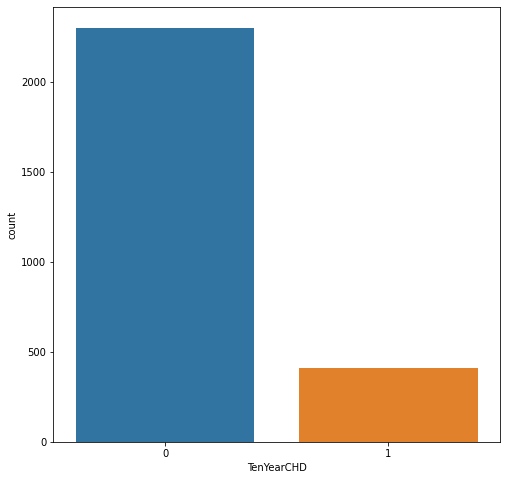

In [40]:
# Plotting the countplot for dependent variable
dep_variable = 'TenYearCHD'
plt.figure(figsize = (8,8))
sns.countplot(train[dep_variable])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


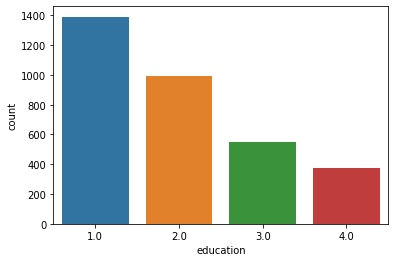

In [41]:
sns.countplot(cardio_df['education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


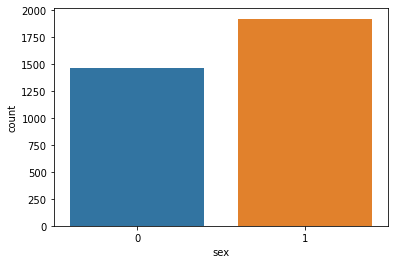

In [42]:
sns.countplot(cardio_df['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


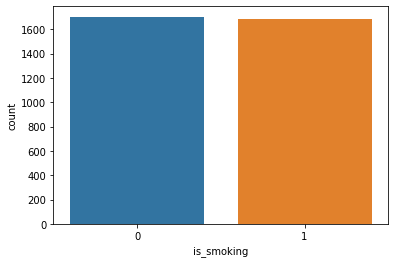

In [43]:
sns.countplot(cardio_df['is_smoking'])

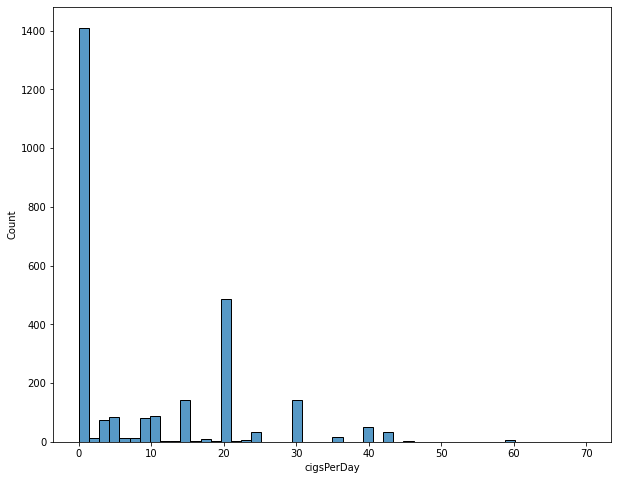

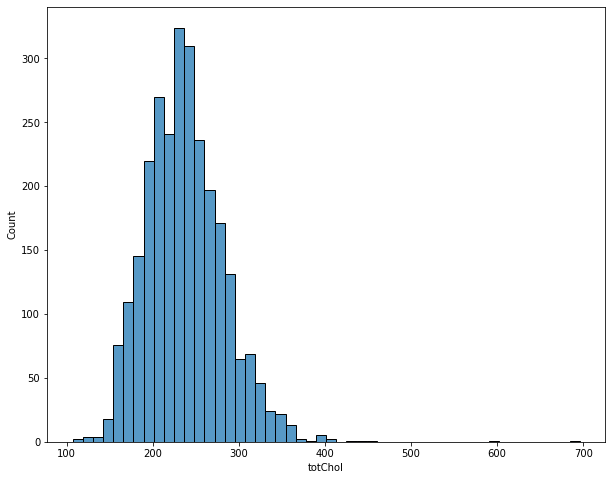

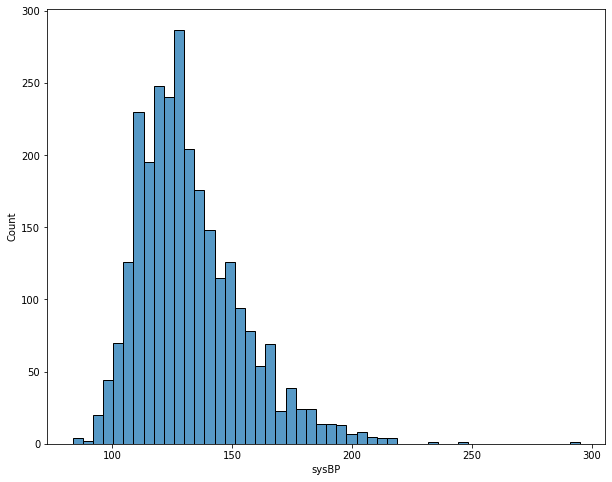

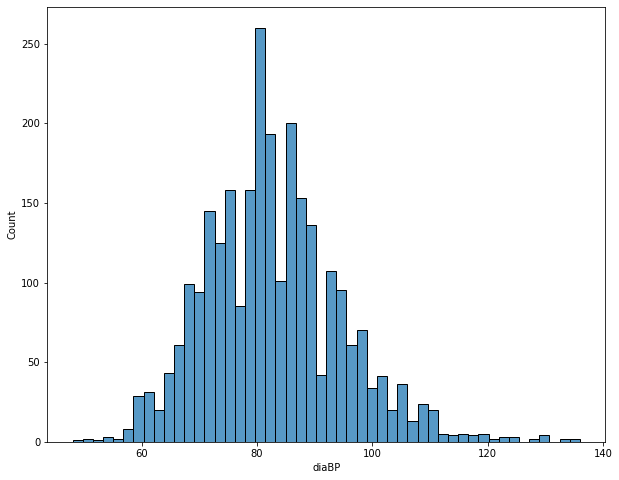

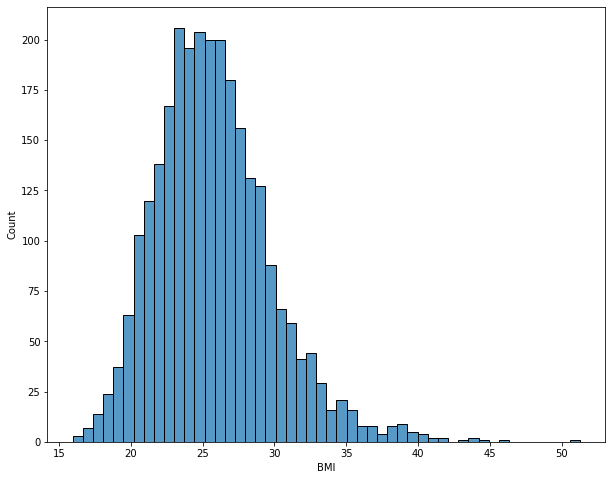

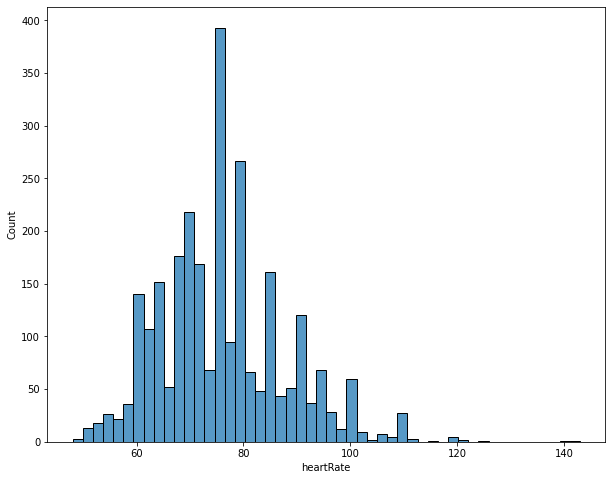

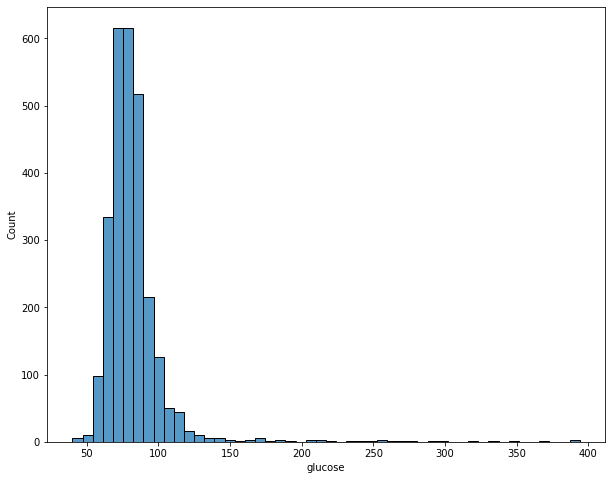

In [44]:
# Plotting distribution of values of cts numerical features
cts_features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for col in cts_features[1:]:
  plt.figure(figsize = (10,8))
  sns.histplot(train[col], bins = 50)
  

**Most of the numerical features are positively skewed.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


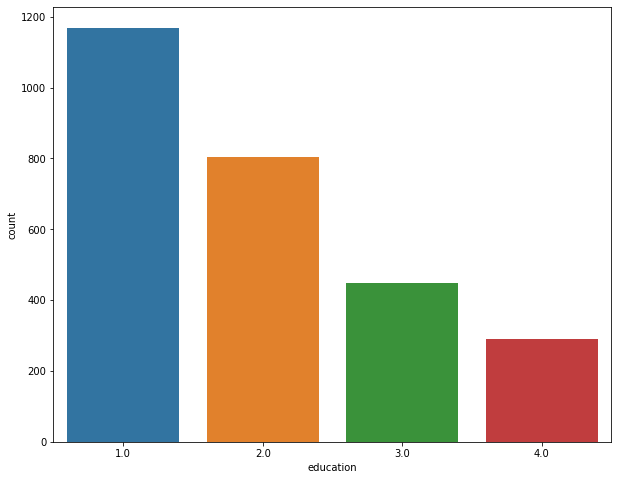

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


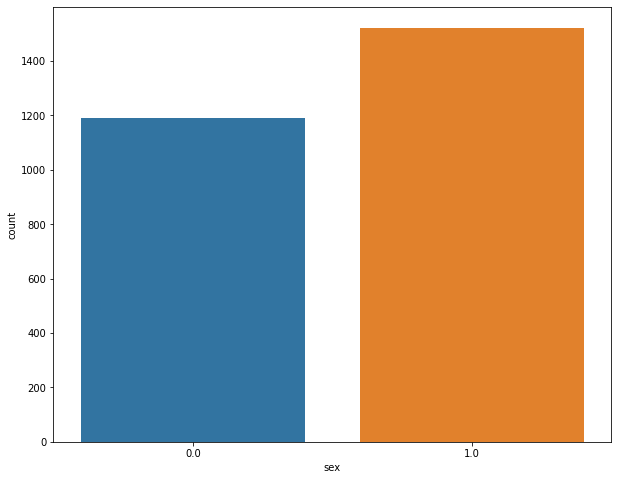

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


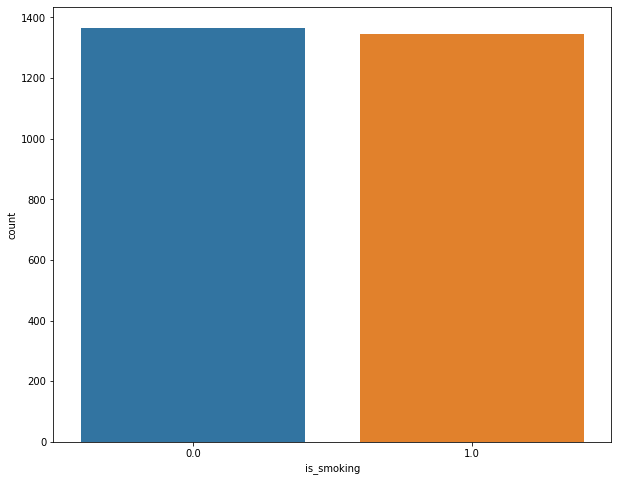

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


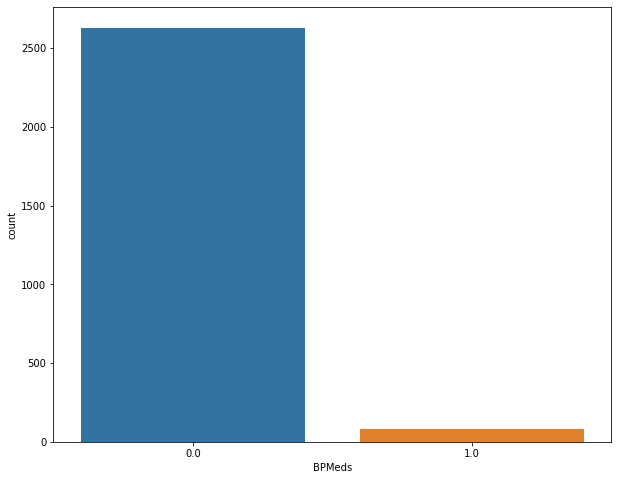

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


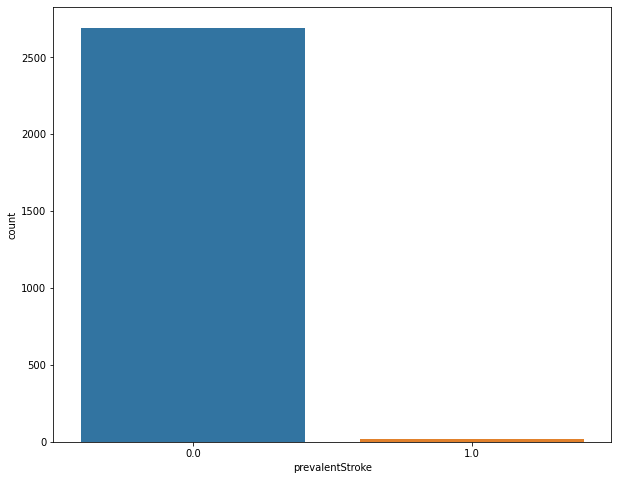

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


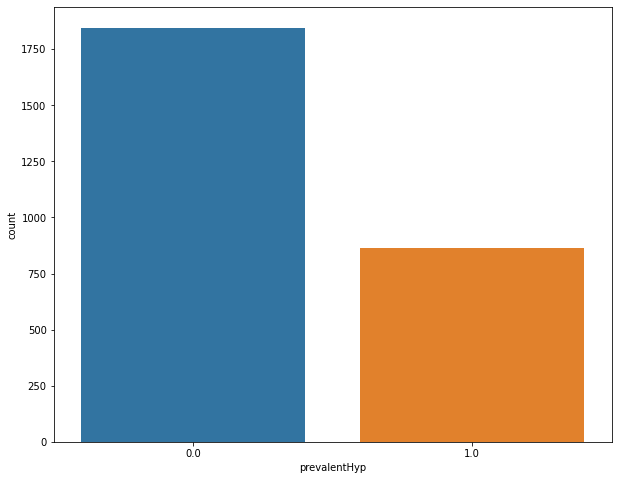

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


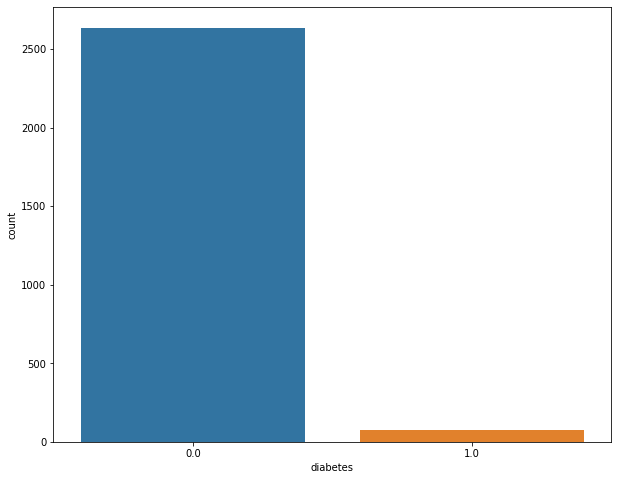

In [45]:
# plotting the count plot of categorical features
cat_features = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for col in cat_features:
  plt.figure(figsize= (10,8))
  sns.countplot(train[col])
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


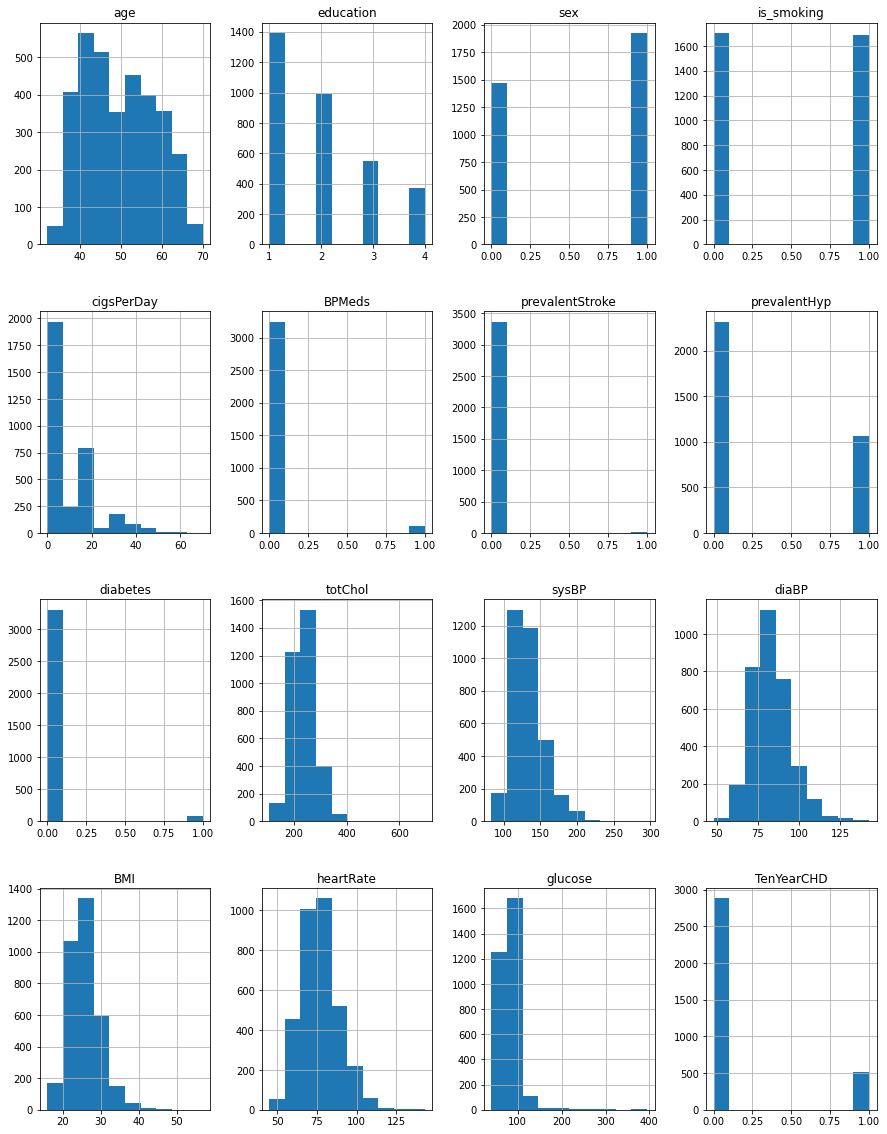

In [46]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
cardio_df.hist(ax = ax)
plt.show()

# **Bivariate analysis**

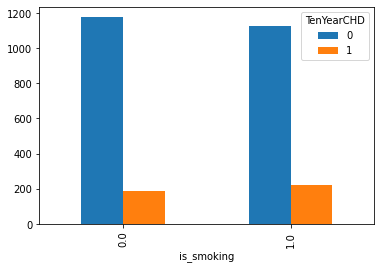

In [47]:
# plotting graph for checking how many users are smoking or not and how it affects the target variable

pd.crosstab(train['is_smoking'],train['TenYearCHD']).plot(kind='bar')

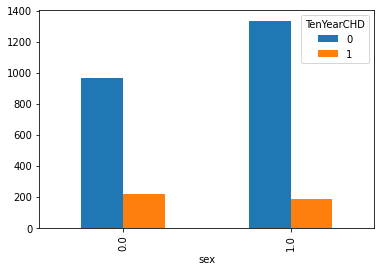

In [48]:
# plotting graph for checking how many persons are male or female and how it affects the target variable

pd.crosstab(train['sex'],train['TenYearCHD']).plot(kind='bar')

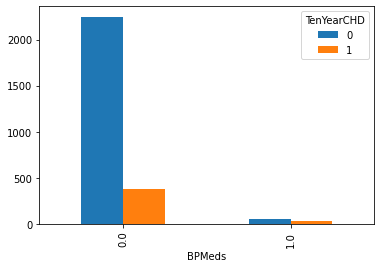

In [49]:
# plotting graph for checking  whether  patient was on blood pressure medication or not and how it affects the target variable

pd.crosstab(train['BPMeds'],train['TenYearCHD']).plot(kind='bar')

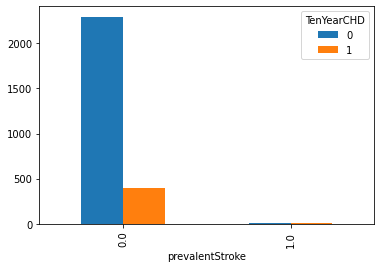

In [50]:
# plotting graph for checking  whether or not the patient had previously had a stroke and how it affects the target variable

pd.crosstab(train['prevalentStroke'],train['TenYearCHD']).plot(kind='bar')

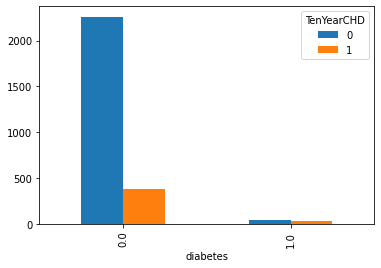

In [51]:
# plotting graph for checking if person is diabetic or not and how it affects the target variable

pd.crosstab(train['diabetes'],train['TenYearCHD']).plot(kind='bar')

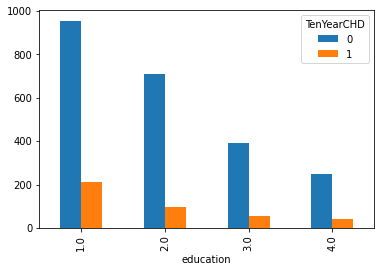

In [52]:
# plotting graph for checking the education values and how it affects the target variable

pd.crosstab(train['education'],train['TenYearCHD']).plot(kind='bar')

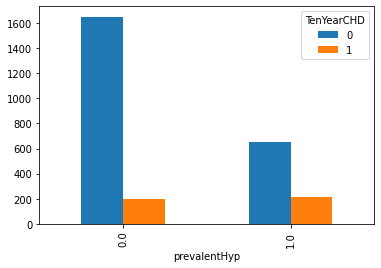

In [53]:
# plotting graph for checking whether or not the patient was hypertensive and how it affects the target variable

pd.crosstab(train['prevalentHyp'],train['TenYearCHD']).plot(kind='bar')

# **Multivariate analysis**

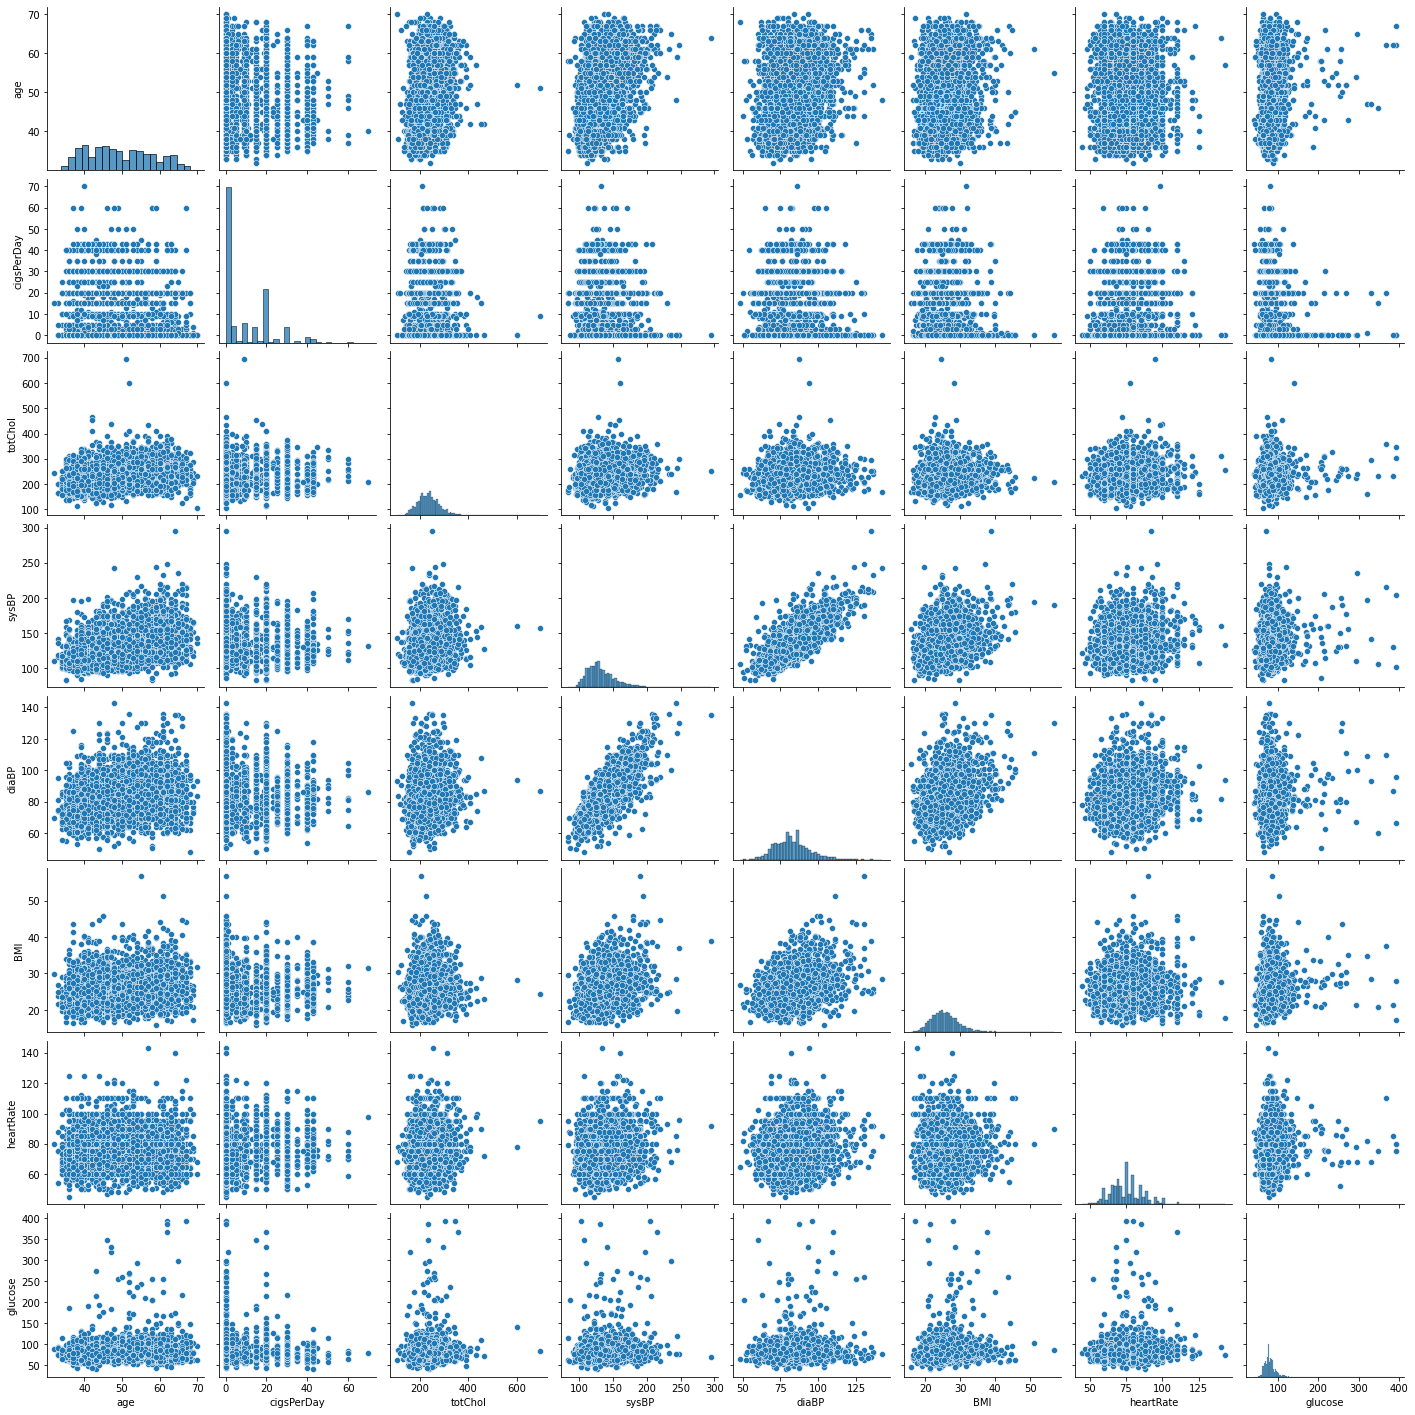

In [54]:
# Plotting pair plot for numerical variables 
sns.pairplot(cardio_df[cts_features])
plt.show()

# **Outliers Detection**

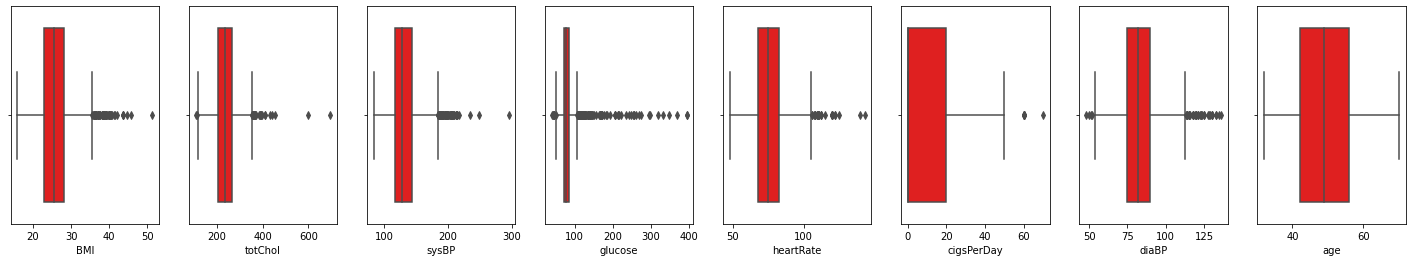

In [55]:
# plotting different column values to check outliers(for train dataset)

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8, figsize=(25,4))
sns.boxplot(x=train['BMI'],ax=ax1,color = 'red')
sns.boxplot(x=train['totChol'],ax=ax2,color = 'red')
sns.boxplot(x=train['sysBP'],ax=ax3,color = 'red')
sns.boxplot(x=train['glucose'],ax=ax4,color = 'red')
sns.boxplot(x=train['heartRate'],ax=ax5,color = 'red')
sns.boxplot(x=train['cigsPerDay'],ax=ax6,color = 'red')
sns.boxplot(x=train['diaBP'],ax=ax7,color = 'red')
sns.boxplot(x=train['age'],ax=ax8,color = 'red')

In [56]:
# function to find outliers using Z score
outlier_list = []

def outlier_detection(cardio_df):
    thres = 3
    mean = np.mean(cardio_df)
    std = np.std(cardio_df)    
    for cardio in cardio_df:
        z_score = (cardio -mean)/std
        if (np.abs(z_score) > thres):
            outlier_list.append(cardio)
    return outlier_list

In [57]:
cols = ['BMI','totChol','sysBP','glucose','heartRate','cigsPerDay','diaBP','age']
for col in cols:
  outlier_values = outlier_detection(train[col])
  print("number of Outliers for feature {}: ".format(col), len(outlier_values))

number of Outliers for feature BMI:  36
number of Outliers for feature totChol:  49
number of Outliers for feature sysBP:  78
number of Outliers for feature glucose:  116
number of Outliers for feature heartRate:  130
number of Outliers for feature cigsPerDay:  140
number of Outliers for feature diaBP:  163
number of Outliers for feature age:  163


In [58]:
# Computing 10th, 90th percentiles and replacing the outliers
def treat_outliers(data):
  fifth_qunatile = data.quantile(0.05) 
  ninetyfive_qunatile  = data.quantile(0.95) 
  data.clip(fifth_qunatile, ninetyfive_qunatile, inplace=True)

for col in cols:
  treat_outliers(train[col])

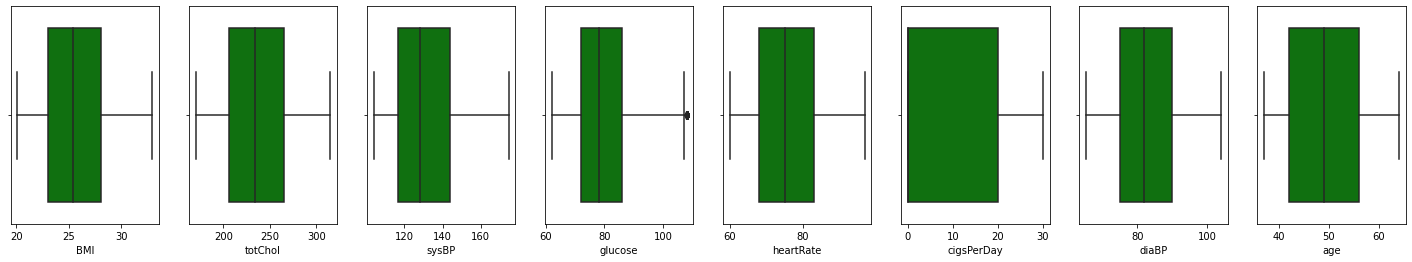

In [59]:
# plotting different column values to check outliers if they exist or not 

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8, figsize=(25,4))
sns.boxplot(x=train['BMI'],ax=ax1,color = 'green')
sns.boxplot(x=train['totChol'],ax=ax2,color = 'green')
sns.boxplot(x=train['sysBP'],ax=ax3,color = 'green')
sns.boxplot(x=train['glucose'],ax=ax4,color = 'green')
sns.boxplot(x=train['heartRate'],ax=ax5,color = 'green')
sns.boxplot(x=train['cigsPerDay'],ax=ax6,color = 'green')
sns.boxplot(x=train['diaBP'],ax=ax7,color = 'green')
sns.boxplot(x=train['age'],ax=ax8,color = 'green')

Outliers removed from training data

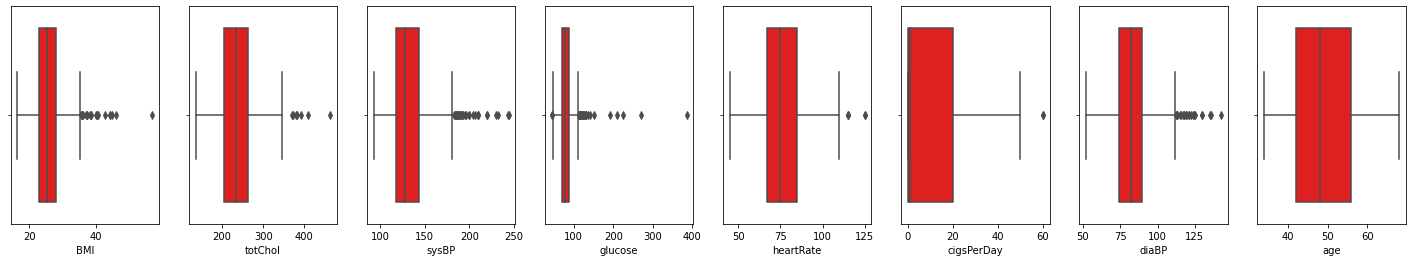

In [60]:
# plotting different column values to check outliers (test data)

fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8, figsize=(25,4))
sns.boxplot(x=test['BMI'],ax=ax1,color = 'red')
sns.boxplot(x=test['totChol'],ax=ax2,color = 'red')
sns.boxplot(x=test['sysBP'],ax=ax3,color = 'red')
sns.boxplot(x=test['glucose'],ax=ax4,color = 'red')
sns.boxplot(x=test['heartRate'],ax=ax5,color = 'red')
sns.boxplot(x=test['cigsPerDay'],ax=ax6,color = 'red')
sns.boxplot(x=test['diaBP'],ax=ax7,color = 'red')
sns.boxplot(x=test['age'],ax=ax8,color = 'red')


In [61]:
# outlier treatment for test data
for col in cols:
  treat_outliers(test[col])

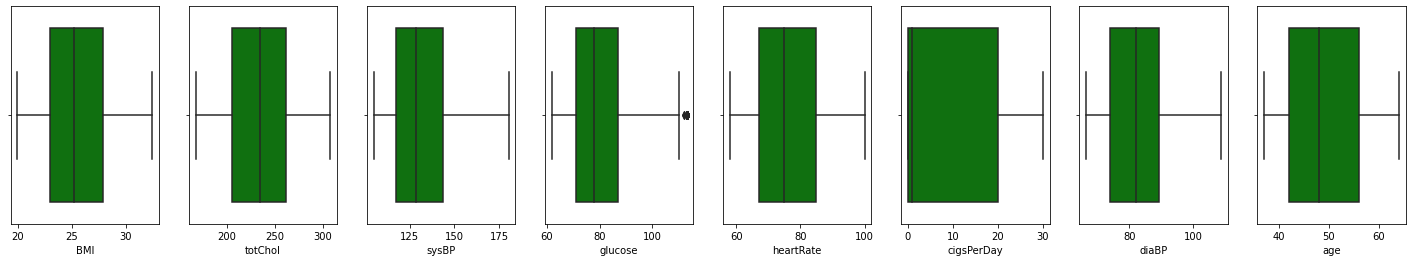

In [62]:
# plotting different column values to check outliers (test data) if exist or not
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8, figsize=(25,4))
sns.boxplot(x=test['BMI'],ax=ax1,color = 'green')
sns.boxplot(x=test['totChol'],ax=ax2,color = 'green')
sns.boxplot(x=test['sysBP'],ax=ax3,color = 'green')
sns.boxplot(x=test['glucose'],ax=ax4,color = 'green')
sns.boxplot(x=test['heartRate'],ax=ax5,color = 'green')
sns.boxplot(x=test['cigsPerDay'],ax=ax6,color = 'green')
sns.boxplot(x=test['diaBP'],ax=ax7,color = 'green')
sns.boxplot(x=test['age'],ax=ax8,color = 'green')

Treatment of outliers in test data done

# **Checking collinearity between variables**

In [63]:
independent_variables = ['age','education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
dependent_variables = ['TenYearCHD']

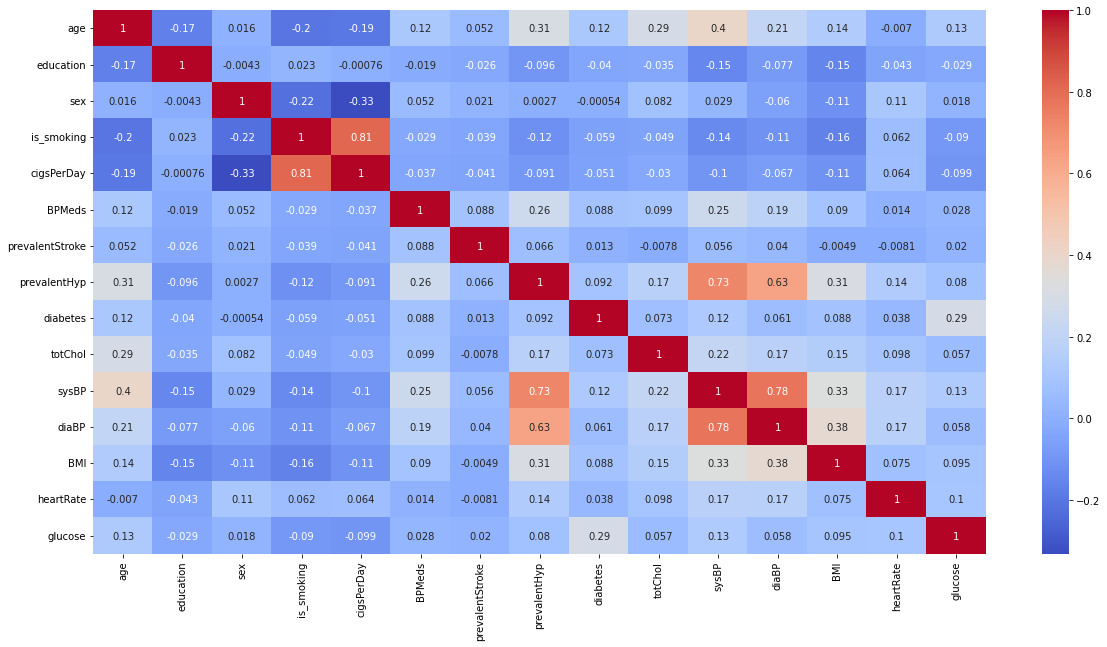

In [64]:
# checking correlation between variables

correlation_calc = train[independent_variables].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="coolwarm")

In [65]:
# dropping columns to remove rows which are combined

train['pulsePressure'] =train['sysBP'] - train['diaBP']
test['pulsePressure'] = test['sysBP']-test['diaBP']
train.drop(['diaBP'],axis=1,inplace=True)
test.drop(['diaBP'],axis=1,inplace=True)
train.drop(['sysBP'],axis=1,inplace=True)
test.drop(['sysBP'],axis=1,inplace=True)
train.drop(['is_smoking'],axis=1,inplace=True)
test.drop(['is_smoking'],axis=1,inplace=True)


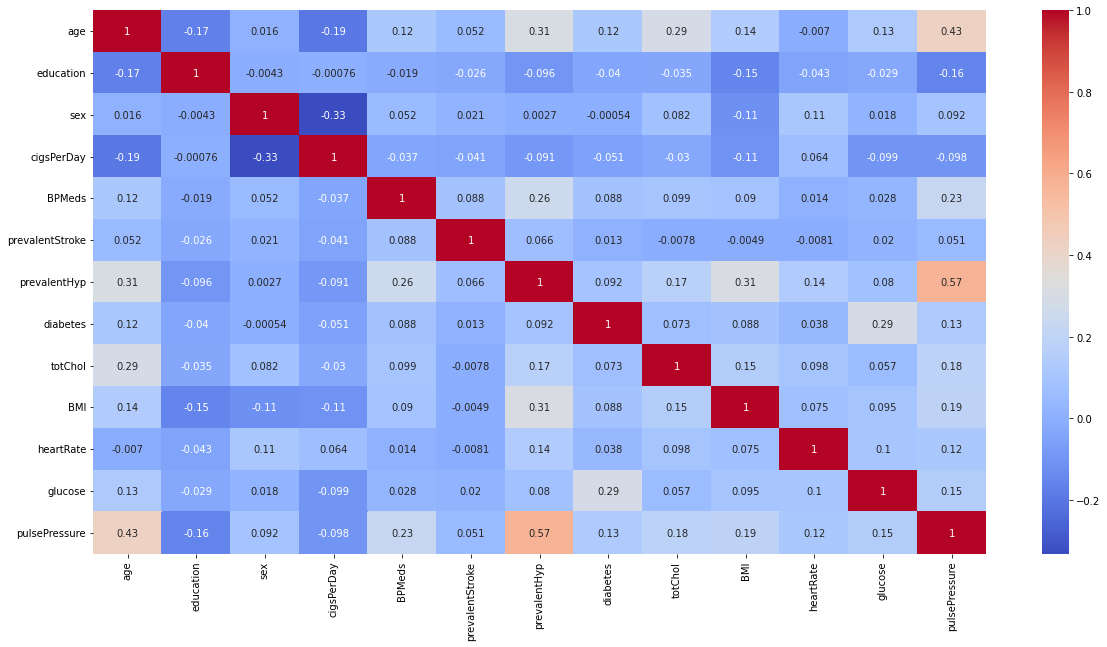

In [66]:
# checking correlation between variables
independent_variables = ['age','education', 'sex', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
        'BMI', 'heartRate', 'glucose','pulsePressure']

correlation_calc = train[independent_variables].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_calc,  annot=True, cmap="coolwarm")

In [67]:
train.drop(['prevalentHyp'],axis=1,inplace=True)
test.drop(['prevalentHyp'],axis=1,inplace=True)

**Resampling of data as data is imbalanced**

In [68]:
independent_variables = ['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
        'diabetes', 'totChol', 'BMI', 'heartRate',
       'glucose',  'pulsePressure']
dependent_variable = ['TenYearCHD']

In [69]:
train_independent = train[independent_variables]
train_dependent =  train[dependent_variables]

In [70]:
train_dependent['TenYearCHD'].value_counts()

0    2303
1     409
Name: TenYearCHD, dtype: int64

**SMOTE**

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input

In [71]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train = smote_enn.fit_resample(train[independent_variables], train[dependent_variables])
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_train, y_train = tl.fit_resample(X_train, y_train)
#from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
#X_train, y_train = oversample.fit_resample(train[independent_variables], train[dependent_variables])

In [72]:
y_train.value_counts()

TenYearCHD
1             2088
0             1240
dtype: int64

Data is now called to be  balanced data 

# **Models Implementation for fitting the training data**

##**Decision Tree Classifier**

In [73]:
train_independent = X_train
train_dependent = y_train

In [74]:
from sklearn.tree import DecisionTreeClassifier
  
# create a regressor object
classifier= DecisionTreeClassifier(random_state = 0) 
  
# fit the regressor with X and Y data
classifier.fit(train_independent, train_dependent)

DecisionTreeClassifier(random_state=0)

In [75]:
# accuracy score for training data

y_pred = classifier.predict(test[independent_variables])
accuracy_score(train_dependent, classifier.predict(train_independent))

1.0

In [76]:
# accuracy score  for testing data

accuracy_score(test[dependent_variables], classifier.predict(test[independent_variables]))

0.6578171091445427

In [77]:
# recall score for training data set
from sklearn.metrics import recall_score
recall_score(train_dependent, classifier.predict(train_independent))

1.0

In [78]:
# recall score for testing data set
recall_score(test[dependent_variables], classifier.predict(test[independent_variables]))

0.37254901960784315

##The goal is to increase recall score as per the problem so as patient is not diagnosed incorrectly

Feature engg -->> scaling 

In [79]:
# using standard scaler to transform data 

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train=scaler.fit_transform(train_independent)
X_test=scaler.fit_transform(test[independent_variables])

In [80]:
# Again implementing decision tree classifier

classifier= DecisionTreeClassifier(random_state = 0) 
classifier.fit(X_train, train_dependent)

DecisionTreeClassifier(random_state=0)

In [81]:
# recall score 
recall_score(train_dependent, classifier.predict(X_train))

1.0

In [82]:
# recall score increased for testing data
recall_score(test[dependent_variables], classifier.predict(X_test))

0.7549019607843137

In [83]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Feature: 0, Score: 0.30695
Feature: 1, Score: 0.05188
Feature: 2, Score: 0.04996
Feature: 3, Score: 0.08679
Feature: 4, Score: 0.00667
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.01857
Feature: 7, Score: 0.10473
Feature: 8, Score: 0.07792
Feature: 9, Score: 0.12264
Feature: 10, Score: 0.07085
Feature: 11, Score: 0.10304


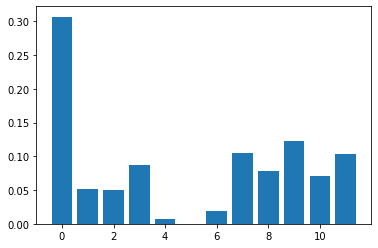

In [84]:
# importance of features can be seen using feature_importances_

importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##Hyperparameter Tuning on decision tree classifier

In [85]:
# applying hyperparameter tuning to control overfitting and find optimal hyperparameters

grid = {"max_depth": [16,17,18],"criterion": ["gini",'entropy'],"min_samples_split":[2,3,4]}

grid = GridSearchCV(classifier, grid, refit = True, verbose = 3, cv=3)
grid.fit(X_train, train_dependent)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END criterion=gini, max_depth=16, min_samples_split=2;, score=0.807 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_split=2;, score=0.874 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_split=2;, score=0.857 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, min_samples_split=3;, score=0.798 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_split=3;, score=0.885 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_split=3;, score=0.852 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=16, min_samples_split=4;, score=0.788 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=16, min_samples_split=4;, score=0.883 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=16, min_samples_split=4;, score=0.856 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=17, min_samples_split=2;, score=0.80

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [16, 17, 18],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)

In [86]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 3}

In [87]:
# recall score for training data

recall_score(train_dependent, grid.predict(X_train))

0.9952107279693486

In [88]:
# recall score for testing data

recall_score(test[dependent_variables], grid.predict(X_test))

0.7352941176470589

In [89]:
from sklearn.metrics import precision_score
precision_score(test[dependent_variables], grid.predict(X_test))

0.14792899408284024

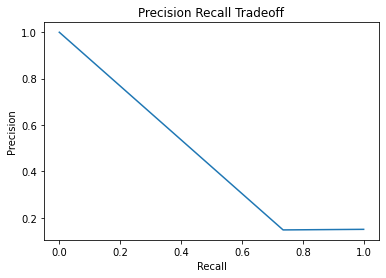

In [90]:
from sklearn.metrics import precision_recall_curve
y_decision_function = grid.predict(X_test)
precision,recall,threshold = precision_recall_curve(test[dependent_variables],y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show()

confusion matrix
[[144 432]
 [ 27  75]]


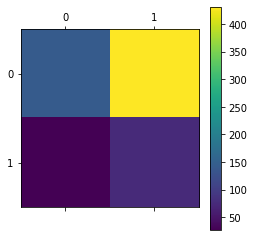

In [91]:
#Confusion Matrix to see false negatives , true positives, true negatives, false positives

conf_matrix = confusion_matrix(test[dependent_variables], grid.predict(X_test))
print("confusion matrix")
print(conf_matrix)
plt.matshow(conf_matrix)
plt.colorbar()

In [92]:
# classification report

print("Classification Report",classification_report(test[dependent_variables], grid.predict(X_test)))

Classification Report               precision    recall  f1-score   support

           0       0.84      0.25      0.39       576
           1       0.15      0.74      0.25       102

    accuracy                           0.32       678
   macro avg       0.50      0.49      0.32       678
weighted avg       0.74      0.32      0.36       678



##**SVM Classifier**

In [93]:
model = svm.SVC(C=1.0, kernel='linear', class_weight='balanced')
model.fit(X_train, train_dependent.values.ravel())

SVC(class_weight='balanced', kernel='linear')

In [94]:
print("Classification Report",classification_report(test[dependent_variables], model.predict(X_test)))

Classification Report               precision    recall  f1-score   support

           0       0.93      0.51      0.66       576
           1       0.22      0.78      0.34       102

    accuracy                           0.55       678
   macro avg       0.57      0.65      0.50       678
weighted avg       0.82      0.55      0.61       678



In [95]:
accuracy_score(test[dependent_variables], model.predict(X_test))

0.5486725663716814

In [96]:
precision_score(test[dependent_variables], model.predict(X_test))

0.21978021978021978

In [97]:
param_grid = {  
              'kernel': ['rbf','linear'],'class_weight':['balanced']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, train_dependent.values.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .class_weight=balanced, kernel=rbf;, score=0.805 total time=   0.4s
[CV 2/5] END .class_weight=balanced, kernel=rbf;, score=0.836 total time=   0.4s
[CV 3/5] END .class_weight=balanced, kernel=rbf;, score=0.836 total time=   0.4s
[CV 4/5] END .class_weight=balanced, kernel=rbf;, score=0.842 total time=   0.4s
[CV 5/5] END .class_weight=balanced, kernel=rbf;, score=0.841 total time=   0.4s
[CV 1/5] END class_weight=balanced, kernel=linear;, score=0.736 total time=   0.4s
[CV 2/5] END class_weight=balanced, kernel=linear;, score=0.751 total time=   0.4s
[CV 3/5] END class_weight=balanced, kernel=linear;, score=0.752 total time=   0.4s
[CV 4/5] END class_weight=balanced, kernel=linear;, score=0.765 total time=   0.4s
[CV 5/5] END class_weight=balanced, kernel=linear;, score=0.750 total time=   0.4s


GridSearchCV(estimator=SVC(),
             param_grid={'class_weight': ['balanced'],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [98]:
print("Classification Report",classification_report(test[dependent_variables], grid.predict(X_test)))

Classification Report               precision    recall  f1-score   support

           0       0.89      0.51      0.65       576
           1       0.19      0.66      0.30       102

    accuracy                           0.54       678
   macro avg       0.54      0.59      0.48       678
weighted avg       0.79      0.54      0.60       678



In [99]:
recall_score(test[dependent_variables], grid.predict(X_test))

0.6568627450980392

In [100]:
precision_score(test[dependent_variables], grid.predict(X_test))

0.1930835734870317

In [101]:
accuracy_score(test[dependent_variables], grid.predict(X_test))

0.5353982300884956

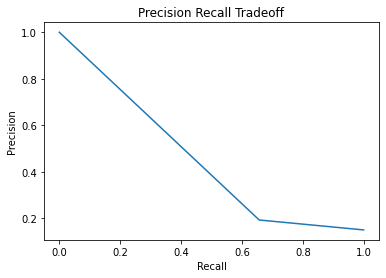

In [102]:
from sklearn.metrics import precision_recall_curve
y_decision_function = grid.predict(X_test)
precision,recall,threshold = precision_recall_curve(test[dependent_variables],y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show()

Hyperparameter tuning reduced recall score value which is not acceptable for this scenario

##**Random Forest Classifier with hyper parameter tuning**

In [103]:
# creating grid for hyperparameters

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [104]:
# using randomized search cv

clf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
rf = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [105]:
rf.fit(X_train,train_dependent.values)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

**Evaluation Metrics**

In [106]:
# recall score on training data
recall_score(train_dependent, rf.predict(X_train))

1.0

In [107]:
# accuracy score on training data
accuracy_score(train_dependent, rf.predict(X_train))

1.0

In [108]:
# recall score on test data

recall_score(test[dependent_variables], rf.predict(X_test))

0.9803921568627451

In [109]:
# precision score on test data
from sklearn.metrics import precision_score
precision_score(test[dependent_variables], rf.predict(X_test))

0.15337423312883436

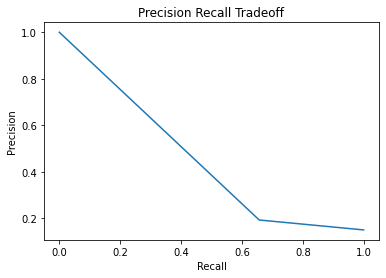

In [110]:
from sklearn.metrics import precision_recall_curve
y_decision_function = grid.predict(X_test)
precision,recall,threshold = precision_recall_curve(test[dependent_variables],y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show()

##**Logistic Regression**

In [111]:
# logistic regression classifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,class_weight='balanced')

In [112]:
# fitting scaled data

clf.fit(X_train, train_dependent.values.ravel())

LogisticRegression(class_weight='balanced', random_state=0)

##**Evaluation of Model**

In [113]:
# accuracy score on test data
accuracy_score(test[dependent_variables], clf.predict(X_test))

0.5398230088495575

In [114]:
# precision score on test data

precision_score(test[dependent_variables], clf.predict(X_test))

0.21621621621621623

In [115]:
# recall score  for training data

recall_score(train_dependent, clf.predict(X_train))

0.75

In [116]:
# recall score  for testing data
recall_score(test[dependent_variables], clf.predict(X_test))

0.7843137254901961

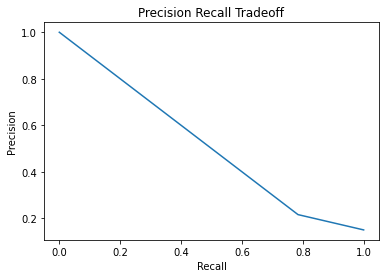

In [117]:
from sklearn.metrics import precision_recall_curve
y_decision_function = clf.predict(X_test)
precision,recall,threshold = precision_recall_curve(test[dependent_variables],y_decision_function)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show()

In [118]:
#classification report

print("Classification Report",classification_report(test[dependent_variables], clf.predict(X_test)))

Classification Report               precision    recall  f1-score   support

           0       0.93      0.50      0.65       576
           1       0.22      0.78      0.34       102

    accuracy                           0.54       678
   macro avg       0.57      0.64      0.49       678
weighted avg       0.82      0.54      0.60       678



confusion matrix
[[286 290]
 [ 22  80]]


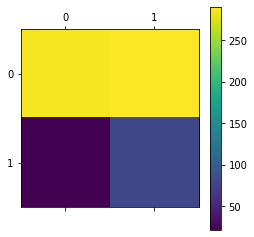

In [119]:
#Confusion Matrix
conf_matrix = confusion_matrix(test[dependent_variables], clf.predict(X_test))
print("confusion matrix")
print(conf_matrix)
plt.matshow(conf_matrix)
plt.colorbar()

##CONCLUSION ---

##Data was imbalanced , SMOTE was used to balance the dataset and to improve the results

##Hyper parameter tuning was applied using Grid Search CV and randomized search cv for different models

##Recall of 78% is achieved using logistic regression

##Recall of 96% is achieved using Random Forest Classifer

##Recall of 78 % is achieved using SVM Classifier

##Recall of 73% is achieved using Decision Tree Classifier